# DATA PREPROCESSING: RETAIL DEMAND PREDICTION

## (A) Categorical Variables

We have 3 datasets. First we'll preprocess all the categorical variables for each dataset.

In [1]:
import pandas as pd
import numpy as np
import warnings
import datetime
import re
import random
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

warnings.filterwarnings('ignore')
%matplotlib inline

### 1. SALES DATA (train_df)

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.shape

(232287, 8)

In [4]:
train_df.dtypes

WEEK_END_DATE     object
STORE_NUM          int64
UPC                int64
PRICE            float64
BASE_PRICE       float64
FEATURE            int64
DISPLAY            int64
UNITS              int64
dtype: object

In [5]:
train_df.isnull().sum()

WEEK_END_DATE     0
STORE_NUM         0
UPC               0
PRICE             3
BASE_PRICE       12
FEATURE           0
DISPLAY           0
UNITS             0
dtype: int64

train_df has following categorical variables:
* **WEEK_END_DATE:** Datetime feature. We will change this to a date-time feature and extract Month and WEEK_OF YEAR columns
* **STORE_NUM:** Unique store identifier. We won't process it as it'll be used to merge tables later
* **UPC:** Unique product identifier. We won't process it as it'll be used to merge tables later
* **FEATURE:** It's already encoded, no preprocessing required.
* **DISPLAY:** This variable is also already encoded, no preprocessing required.

In [6]:
train_df['WEEK_END_DATE'] = pd.to_datetime(train_df['WEEK_END_DATE'])
train_df['MONTH'] = train_df['WEEK_END_DATE'].dt.month

In [7]:
train_df.head()

,WEEK_END_DATE,STORE_NUM,UPC,PRICE,BASE_PRICE,FEATURE,DISPLAY,UNITS,MONTH
0,2009-01-14,367,1111009477,1.39,1.57,0,0,13,1
1,2009-01-14,367,1111009497,1.39,1.39,0,0,20,1
2,2009-01-14,367,1111085319,1.88,1.88,0,0,14,1
3,2009-01-14,367,1111085345,1.88,1.88,0,0,29,1
4,2009-01-14,367,1111085350,1.98,1.98,0,0,35,1


### 2. PRODUCT DATA (product_df)

In [8]:
product_df = pd.read_csv('product_data.csv')
product_df.shape

(30, 6)

In [9]:
product_df.dtypes

UPC              int64
DESCRIPTION     object
MANUFACTURER    object
CATEGORY        object
SUB_CATEGORY    object
PRODUCT_SIZE    object
dtype: object

In [10]:
product_df.isnull().sum()

UPC             0
DESCRIPTION     0
MANUFACTURER    0
CATEGORY        0
SUB_CATEGORY    0
PRODUCT_SIZE    0
dtype: int64

In [11]:
x = pd.DataFrame({
                'Variable': ['DESCRIPTION', 'MANUFACTURER', 'CATEGORY', 'SUB_CATEGORY', 'PRODUCT_SIZE'],
                'Classes': [product_df['DESCRIPTION'].nunique(), product_df['MANUFACTURER'].nunique(), product_df['CATEGORY'].nunique(), product_df['SUB_CATEGORY'].nunique(), product_df['PRODUCT_SIZE'].nunique()]
                })
x

,Variable,Classes
0,DESCRIPTION,29
1,MANUFACTURER,9
2,CATEGORY,4
3,SUB_CATEGORY,7
4,PRODUCT_SIZE,16


Above is the number of unique values each variable contains. Let's look at the method we're going to use these variables:
* DESCRIPTION: In the description, we have category, subcategory and size of the product and these are already present in the other features as well. So, We will drop this feature as it will not add much value to the model.
* MANUFACTURER, CATEGORY, SUB_CATEGORY: As, there is no order in the given categories, so we will One Hot Encode this features.
* PRODUCT_SIZE - The product size units are different for different categories of products. So, here for each category we will do the binning based on different sizes.

In [12]:
product_df.drop(columns = 'DESCRIPTION', axis = 1, inplace = True)

In [13]:
product_df

,UPC,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE
0,1111009477,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
1,1111009497,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
2,1111009507,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
3,1111038078,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML
4,1111038080,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML
5,1111085319,PRIVATE LABEL,COLD CEREAL,ALL FAMILY CEREAL,12.25 OZ
6,1111085345,PRIVATE LABEL,COLD CEREAL,ADULT CEREAL,20 OZ
7,1111085350,PRIVATE LABEL,COLD CEREAL,ALL FAMILY CEREAL,18 OZ
8,1111087395,PRIVATE LABEL,FROZEN PIZZA,PIZZA/PREMIUM,32.7 OZ
9,1111087396,PRIVATE LABEL,FROZEN PIZZA,PIZZA/PREMIUM,30.5 OZ


In [14]:
# We will split the PRODUCT_SIZE string at the space to separate the numerical value from Units 
# And keep only the numeric part in a new vairable SIZE
product_df['SIZE'] = product_df['PRODUCT_SIZE'].apply(lambda x: x.split(' ')[0])
product_df.drop(columns = 'PRODUCT_SIZE', axis = 1, inplace = True)

In [15]:
#Change the SIZE datatype from Object to float
product_df['SIZE'] = product_df['SIZE'].astype('float')

In [16]:
product_df.groupby('CATEGORY')['SIZE'].unique()

CATEGORY
BAG SNACKS                                  [15.0, 16.0, 10.0]
COLD CEREAL              [12.25, 20.0, 18.0, 12.0, 15.0, 12.2]
FROZEN PIZZA              [32.7, 30.5, 29.6, 29.8, 28.3, 22.7]
ORAL HYGIENE PRODUCTS                             [500.0, 1.0]
Name: SIZE, dtype: object

In [17]:
# One Hot Encode the features
OHE_p = ce.OneHotEncoder(cols= ['MANUFACTURER', 'CATEGORY', 'SUB_CATEGORY'])

In [18]:
# transform the data
product_df = OHE_p.fit_transform(product_df)

In [19]:
product_df.head()

,UPC,MANUFACTURER_1,MANUFACTURER_2,MANUFACTURER_3,MANUFACTURER_4,MANUFACTURER_5,MANUFACTURER_6,MANUFACTURER_7,MANUFACTURER_8,MANUFACTURER_9,...,CATEGORY_3,CATEGORY_4,SUB_CATEGORY_1,SUB_CATEGORY_2,SUB_CATEGORY_3,SUB_CATEGORY_4,SUB_CATEGORY_5,SUB_CATEGORY_6,SUB_CATEGORY_7,SIZE
0,1111009477,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,15.0
1,1111009497,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,15.0
2,1111009507,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,15.0
3,1111038078,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,500.0
4,1111038080,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,500.0


In [20]:
# shape of the updated data
product_df.shape

(30, 22)

### 3. STORE DATA (store_df)

In [21]:
store_df = pd.read_csv('store_data.csv')
store_df.shape

(76, 9)

In [22]:
store_df.head()

,STORE_ID,STORE_NAME,ADDRESS_CITY_NAME,ADDRESS_STATE_PROV_CODE,MSA_CODE,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,367,15TH & MADISON,COVINGTON,KY,17140,VALUE,196.0,24721,12707
1,389,SILVERLAKE,ERLANGER,KY,17140,MAINSTREAM,408.0,46073,24767
2,613,EAST ALLEN,ALLEN,TX,19100,MAINSTREAM,464.0,64926,29386
3,623,HOUSTON,HOUSTON,TX,26420,MAINSTREAM,NaN,46930,36741
4,2277,ANDERSON TOWNE CTR,CINCINNATI,OH,17140,UPSCALE,NaN,81958,54053


In [23]:
store_df.isnull().sum()

STORE_ID                    0
STORE_NAME                  0
ADDRESS_CITY_NAME           0
ADDRESS_STATE_PROV_CODE     0
MSA_CODE                    0
SEG_VALUE_NAME              0
PARKING_SPACE_QTY          51
SALES_AREA_SIZE_NUM         0
AVG_WEEKLY_BASKETS          0
dtype: int64

In [24]:
store_df.dtypes

STORE_ID                     int64
STORE_NAME                  object
ADDRESS_CITY_NAME           object
ADDRESS_STATE_PROV_CODE     object
MSA_CODE                     int64
SEG_VALUE_NAME              object
PARKING_SPACE_QTY          float64
SALES_AREA_SIZE_NUM          int64
AVG_WEEKLY_BASKETS           int64
dtype: object

* STORE_ID - No changes required as it is a key and will be used to merge files later.
* STORE_NAME - Since, Out of 76 different stores we have 72 unique store names. Store name contains some location information of the store which we already have in the form of address city name and state. This will be dropped.
* ADDRESS_CITY_NAME - Since, Out of 76 different stores we have 51 unique address city names, So we will drop this feature due to high cardinality
* ADDRESS_STATE_PROV_CODE, MSA_CODE - As, there is no order in the given categories, So, we will One Hot Encode this variable.
* SEG_VALUE_NAME - Stores segments are divided into 3 categories: upscale, mainstream and value. Upscale stores are just what they sound like; they are normally located in high income neighborhoods and offer more high-end product. Mainstream is middle of the road, mostly located in middle class areas, offering a mix of upscale and value product. Value stores cater more to low income customers, so there will be more focus on low prices than anything else.
    
    So we will map VALUE AS 1, MAINSTREAM AS 2 and UPSCALE AS 3

In [25]:
store_df = store_df.drop(columns=['STORE_NAME', 'ADDRESS_CITY_NAME'])

In [26]:
OHE = ce.OneHotEncoder(cols=['ADDRESS_STATE_PROV_CODE', 'MSA_CODE'])

store_df['SEG_VALUE_NAME'] = store_df['SEG_VALUE_NAME'].map({'VALUE': 1, 'MAINSTREAM' : 2, 'UPSCALE': 3})

In [27]:
store_df = OHE.fit_transform(store_df)
store_df.shape

(76, 18)

In [28]:
store_df.head()

,STORE_ID,ADDRESS_STATE_PROV_CODE_1,ADDRESS_STATE_PROV_CODE_2,ADDRESS_STATE_PROV_CODE_3,ADDRESS_STATE_PROV_CODE_4,MSA_CODE_1,MSA_CODE_2,MSA_CODE_3,MSA_CODE_4,MSA_CODE_5,MSA_CODE_6,MSA_CODE_7,MSA_CODE_8,MSA_CODE_9,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,367,1,0,0,0,1,0,0,0,0,0,0,0,0,1,196.0,24721,12707
1,389,1,0,0,0,1,0,0,0,0,0,0,0,0,2,408.0,46073,24767
2,613,0,1,0,0,0,1,0,0,0,0,0,0,0,2,464.0,64926,29386
3,623,0,1,0,0,0,0,1,0,0,0,0,0,0,2,NaN,46930,36741
4,2277,0,0,1,0,1,0,0,0,0,0,0,0,0,3,NaN,81958,54053


## (B) CONTINUOUS VARIABLES

### 1. train_df

In [29]:
train_df.head()

,WEEK_END_DATE,STORE_NUM,UPC,PRICE,BASE_PRICE,FEATURE,DISPLAY,UNITS,MONTH
0,2009-01-14,367,1111009477,1.39,1.57,0,0,13,1
1,2009-01-14,367,1111009497,1.39,1.39,0,0,20,1
2,2009-01-14,367,1111085319,1.88,1.88,0,0,14,1
3,2009-01-14,367,1111085345,1.88,1.88,0,0,29,1
4,2009-01-14,367,1111085350,1.98,1.98,0,0,35,1


train_df  has the following numerical features
* BASE_PRICE
* UNITS (Target)

We will Check and impute the missing values in the numerical features.
And Check for the outliers and treat them.

In [30]:
train_df.drop(columns = 'PRICE', axis = 1, inplace = True)

In [31]:
# Checking for Missing values
train_df[['UNITS', 'BASE_PRICE']].isnull().sum()

UNITS          0
BASE_PRICE    12
dtype: int64

In [32]:
train_df[train_df['BASE_PRICE'].isnull() == True]

,WEEK_END_DATE,STORE_NUM,UPC,BASE_PRICE,FEATURE,DISPLAY,UNITS,MONTH
279,2009-01-14,4245,1111087395,NaN,0,1,56,1
280,2009-01-14,4245,1111087398,NaN,0,1,72,1
301,2009-01-14,4259,1111087395,NaN,0,1,52,1
303,2009-01-14,4259,1111087398,NaN,0,1,52,1
1918,2009-01-21,4245,1111087395,NaN,0,1,52,1
1919,2009-01-21,4245,1111087398,NaN,0,1,82,1
1940,2009-01-21,4259,1111087395,NaN,0,1,28,1
3555,2009-01-28,4245,1111087395,NaN,1,1,45,1
3556,2009-01-28,4245,1111087398,NaN,1,1,34,1
3577,2009-01-28,4259,1111087395,NaN,1,1,31,1


In [33]:
# create a new dataframe which will have "average base price" for the combination of STORE_NUM and UPC
# we will use this to impute the missing values 
avg_price = train_df.groupby(['STORE_NUM', 'UPC'])['BASE_PRICE'].mean().reset_index()
avg_price

,STORE_NUM,UPC,BASE_PRICE
0,367,1111009477,1.489859
1,367,1111009497,1.490634
2,367,1111085319,1.843451
3,367,1111085345,1.827183
4,367,1111085350,2.322113
...,...,...,...
1639,29159,7192100336,6.494965
1640,29159,7192100337,6.496312
1641,29159,7192100339,6.504085
1642,29159,7797502248,2.445634


In [34]:
# define function to fill missing base price values
def fill_base_price(x) :
    return avg_price['BASE_PRICE'][(avg_price['STORE_NUM'] == x['STORE_NUM']) & (avg_price['UPC'] == x['UPC'])].values[0]

In [35]:
train_df['BASE_PRICE'][train_df['BASE_PRICE'].isna() == True] = train_df[train_df['BASE_PRICE'].isna() == True].apply(fill_base_price, axis=1)

We have imputed the missing values in BASE_PRICE column. Now we'll look into other continuous variable - UNITS

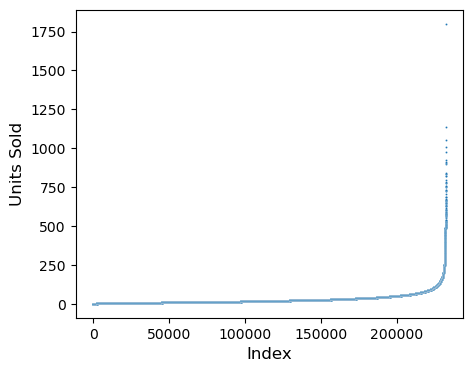

In [36]:
plt.figure(figsize=(5,4), dpi = 100)
sns.scatterplot(x = range(train_df.shape[0]), y = np.sort(train_df['UNITS'].values), s = 2)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.show()

We see, there are some outliers present in the data. We will check the number of data points where UNITS sold is more than 750.

In [37]:
train_df[train_df['UNITS'] > 750].shape

(21, 8)

Number of data points which have UNITS sold more than 750 are only 21, it's only a small number of observations and will not affect our modeling so we can completely remove these outliers from the dataset.

In [38]:
train_df = train_df[train_df['UNITS'] < 750]

In [39]:
train_df.shape

(232265, 8)

### 2. product_df

In [40]:
product_df.head()

,UPC,MANUFACTURER_1,MANUFACTURER_2,MANUFACTURER_3,MANUFACTURER_4,MANUFACTURER_5,MANUFACTURER_6,MANUFACTURER_7,MANUFACTURER_8,MANUFACTURER_9,...,CATEGORY_3,CATEGORY_4,SUB_CATEGORY_1,SUB_CATEGORY_2,SUB_CATEGORY_3,SUB_CATEGORY_4,SUB_CATEGORY_5,SUB_CATEGORY_6,SUB_CATEGORY_7,SIZE
0,1111009477,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,15.0
1,1111009497,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,15.0
2,1111009507,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,15.0
3,1111038078,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,500.0
4,1111038080,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,500.0


This dataset has no numerical feature

### 3. store_df

In [41]:
store_df.head()

,STORE_ID,ADDRESS_STATE_PROV_CODE_1,ADDRESS_STATE_PROV_CODE_2,ADDRESS_STATE_PROV_CODE_3,ADDRESS_STATE_PROV_CODE_4,MSA_CODE_1,MSA_CODE_2,MSA_CODE_3,MSA_CODE_4,MSA_CODE_5,MSA_CODE_6,MSA_CODE_7,MSA_CODE_8,MSA_CODE_9,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,367,1,0,0,0,1,0,0,0,0,0,0,0,0,1,196.0,24721,12707
1,389,1,0,0,0,1,0,0,0,0,0,0,0,0,2,408.0,46073,24767
2,613,0,1,0,0,0,1,0,0,0,0,0,0,0,2,464.0,64926,29386
3,623,0,1,0,0,0,0,1,0,0,0,0,0,0,2,NaN,46930,36741
4,2277,0,0,1,0,1,0,0,0,0,0,0,0,0,3,NaN,81958,54053


In [42]:
store_df.shape

(76, 18)

store_df has the following numerical features
- PARKING_SPACE_QTY
- SALES_AREA_SIZE_NUM
- AVG_WEEKLY_BASKETS

In [43]:
store_df.isnull().sum()

STORE_ID                      0
ADDRESS_STATE_PROV_CODE_1     0
ADDRESS_STATE_PROV_CODE_2     0
ADDRESS_STATE_PROV_CODE_3     0
ADDRESS_STATE_PROV_CODE_4     0
MSA_CODE_1                    0
MSA_CODE_2                    0
MSA_CODE_3                    0
MSA_CODE_4                    0
MSA_CODE_5                    0
MSA_CODE_6                    0
MSA_CODE_7                    0
MSA_CODE_8                    0
MSA_CODE_9                    0
SEG_VALUE_NAME                0
PARKING_SPACE_QTY            51
SALES_AREA_SIZE_NUM           0
AVG_WEEKLY_BASKETS            0
dtype: int64

Parking Space column ahs 51 missing values

In [44]:
store_df[['PARKING_SPACE_QTY', 'SALES_AREA_SIZE_NUM']].corr()

,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM
PARKING_SPACE_QTY,1.000000,0.763274
SALES_AREA_SIZE_NUM,0.763274,1.000000


Since the correlation of the PARKING_SPACE_QTY with SALES_AREA_SIZE_NUM is high so we can drop this column as it will not add much value to the model.

In [45]:
store_df = store_df.drop(columns=['PARKING_SPACE_QTY'])

## (C) SAVE THE UPDATED FILES

In [46]:
train_df.to_csv('updated_train_data.csv',index=False)
product_df.to_csv('updated_product_data.csv',index=False)
store_df.to_csv('updated_store_data.csv',index=False)